## Table of Contents

1. [Basic Feature Engineering](#feature_engg)
2. [Missing Value Treatment](#missing_val)
3. [Dealing with Categorical Predictors](#category)


# Data Pre-Processing Objective

As part of data pre-processing we will do the following:

1. We treat missing values:
        a. For features, where missing value simply indcates that that fetaure is not available, we replace missing value with some replacement string (e.g. "ValueNotAvaialble")
        b. Variables such as LotFrontage seems to have missing values in random. We do a median imputation for these variables
2. For categorical predictors:
        a. We will do 1-Hot encoding for categorical features with no inherent order among categroies
        b. We will do label encoding for categorical features with some inherent order
3. We scale continous features (Age, Income etc) and do an outlier check. Outliers are then treated by capping the values to max/min above 3 sd's
4. We finally merge all the subsets, to create a final dataset that we use for modelling

## Basic Feature Engineering <a name ="feature_engg"></a>

In [7]:
# Read the combined data in (combined data includes both Training and Submission file)
%matplotlib inline
import pandas as pd
import seaborn as sns
housing_df = pd.read_csv("housing_data.csv") 

C:\Users\anup.a.nair\AppData\Local\Continuum\miniconda3\envs\deap2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


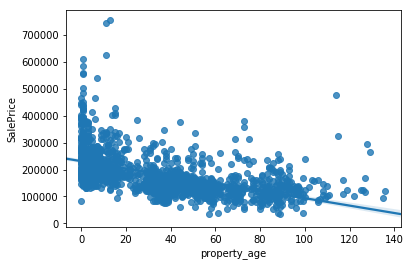

In [8]:
# Create new feature "property age" 
housing_df["property_age"] = housing_df["YrSold"] - housing_df["YearBuilt"]

# Visualy inspect if there is a relationship between the feature created and the target variable
sns.regplot(x = "property_age", y = "SalePrice", data = housing_df);

## Missing Value Treatment <a name="missing_val"></a>

In [3]:
# Count missing values using "isnull()" method in pandas
na_vals = # complete code

# filter out variables with NAs > 0
features_with_nas = # complete code
features_with_nas

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
housing_df[cols].median()

BsmtFinSF1       383.5
BsmtFinSF2         0.0
BsmtUnfSF        477.5
TotalBsmtSF      991.5
BsmtFullBath       0.0
BsmtHalfBath       0.0
GarageYrBlt     1980.0
GarageArea       480.0
GarageCars         2.0
MasVnrArea         0.0
LotFrontage       69.0
dtype: float64

In [9]:
# Variables missing at random - we do a median imputation

cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','LotFrontage']
housing_df[cols] = housing_df[cols].fillna(housing_df[cols].median())

#### In class assignment

For feature "MasVnrType" we do a mode imputation - Replace it with the most common category value


In [7]:
# For other features, missing value simply indicates feature not being available
housing_df = housing_df.fillna("FeatureNotAvailable")

In [8]:
# We confirm that there are no more missing values
na_vals = housing_df.isnull().sum()
features_with_nas = na_vals[na_vals > 0]
features_with_nas

Series([], dtype: int64)

## Dealing with Categorical Predictors <a name="category"></a>

We do a "Label Encoding" for features where the Categories has an inherent order

In [14]:
# Label encoding of ordinal values
label_features = ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual",
                  "FireplaceQu","GarageQual","GarageCond","PoolQC"]


housing_df[label_features] = housing_df[label_features].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po',"ValueNotAvailable"], 
                     [5, 4, 3, 2, 1,0]) 

housing_df["LotShape"] = housing_df["LotShape"].replace(['Reg', 'IR1', 'IR2', 'IR3'], 
                     [4, 3, 2, 1]) 

housing_df[["BsmtFinType1","BsmtFinType2"]] = housing_df[["BsmtFinType1","BsmtFinType2"]].replace(['GLQ', 'ALQ', 'BLQ', 'Rec','LwQ','Unf','ValueNotAvailable'], 
                     [7, 6, 5, 4, 3, 2, 1]) 

In [15]:
housing_df["BsmtQual"].value_counts()

3                      649
4                      618
5                      121
FeatureNotAvailable     37
2                       35
Name: BsmtQual, dtype: int64

<b> For all other Categorical predictors, we do a "1-Hot-Encoding" </b>

In [16]:
housing_df
housing_df_mod = pd.get_dummies(housing_df)
housing_df_mod.shape

(1460, 289)

In [17]:
# Save processed data
housing_df_mod.to_csv("housing_df_mod.csv",index=False)